# Nonlinear SVM Classification
* Adding Degree features can make dataset linearly sepearable

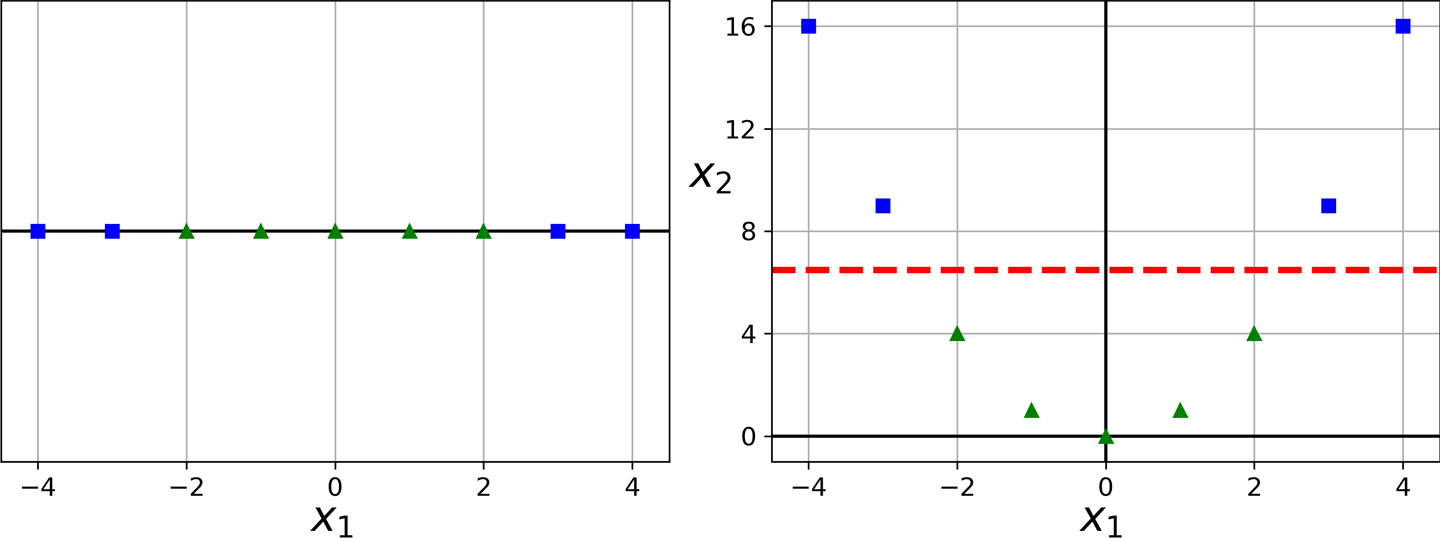

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.svm import LinearSVC

In [3]:
X, y = make_moons(n_samples=100, noise=0.15)

* PolynomialFeatures helps to create from general features to a polynomial features, but not models

In [4]:
poly_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('poly_svm_clf', LinearSVC(C=10, loss='hinge', max_iter=10000))
])

In [5]:
poly_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('poly_svm_clf',
                 LinearSVC(C=10, loss='hinge', max_iter=10000))])

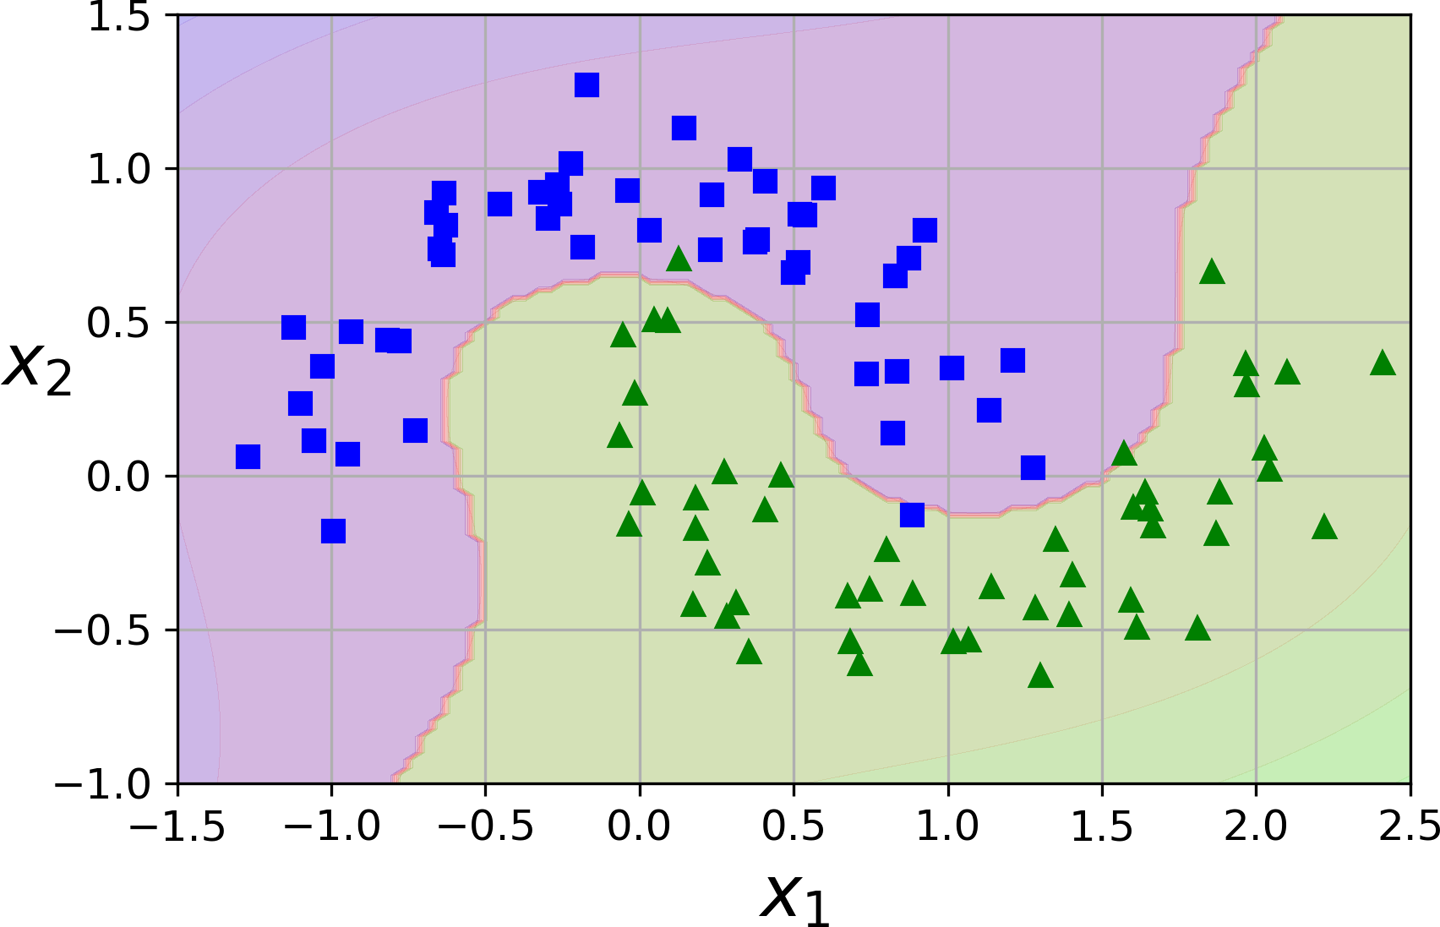

## 1. Polynomial Kernel
* The model itself creates polynomial combinations from features
* No need to convert general fetures to polynomial ones

In [6]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_kernel_svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])

In [7]:
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_kernel_svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

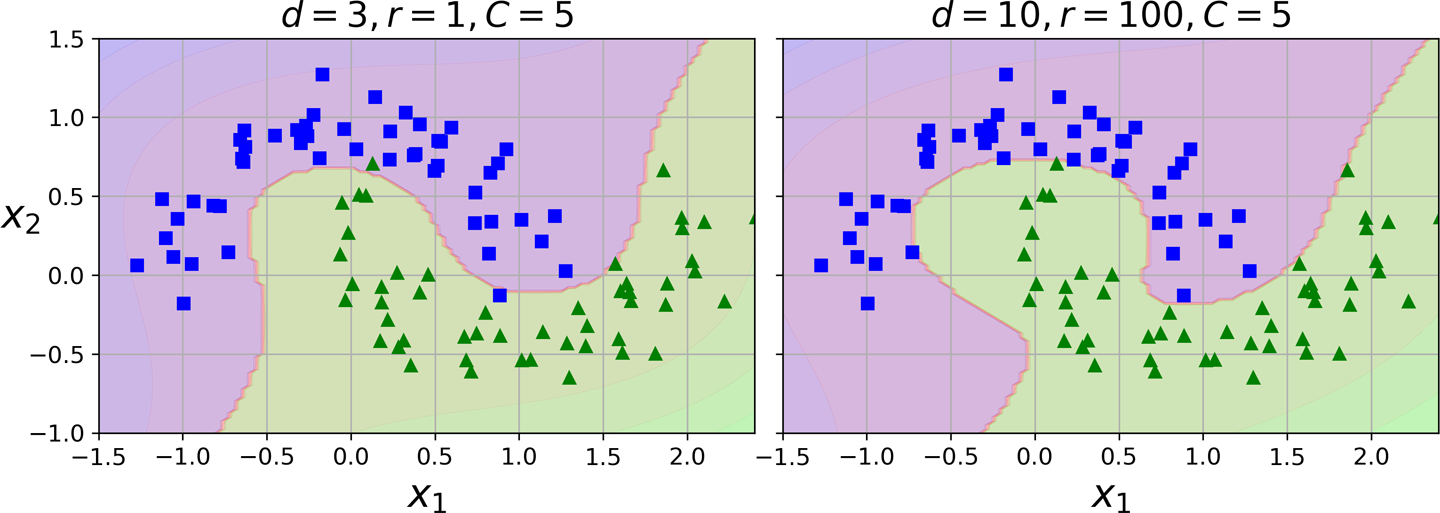

## 2. Similarity Features
* Alternative technique to tackle nonlinear problems by adding `similarity function`
* Alternative of Polynomial Kernel
* Gaussian RBF = similarity function
* Goal = dropping actual real features and creating similarity function features via Gaussian RBF kernel to make it more linearly separable
* Actual features (mxn), Gaussian RBf (mxm) => complex for huge datasets

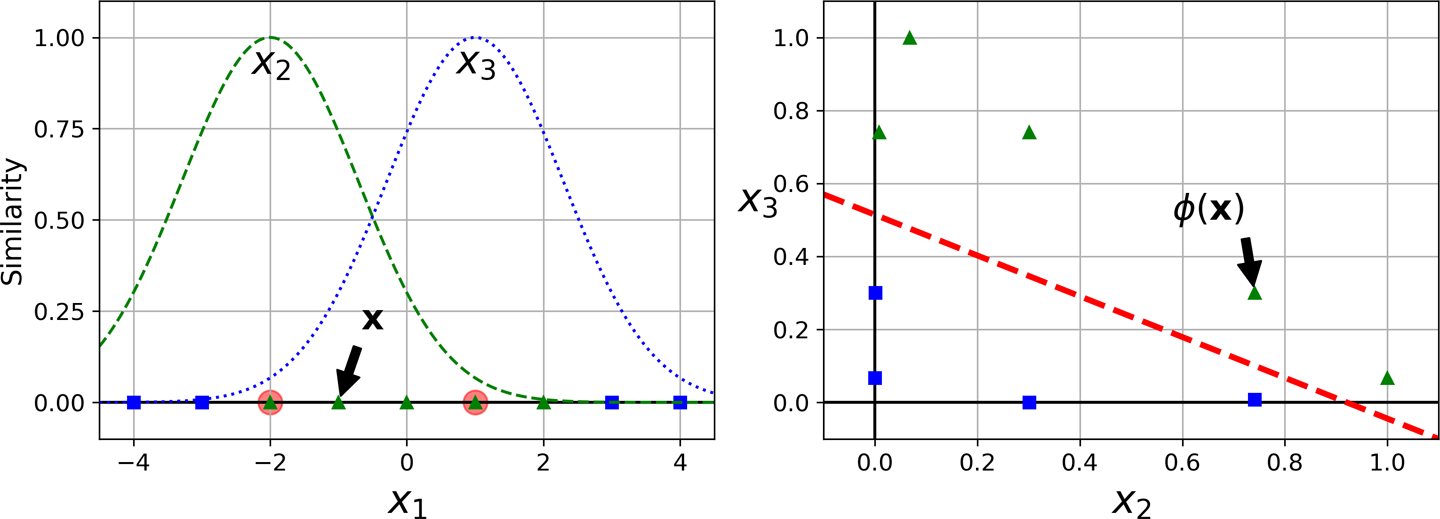

## 3. Gaussian RBF Kernel

In [8]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('rbf_kernel_svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))
])

In [9]:
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rbf_kernel_svm_clf', SVC(C=0.001, gamma=5))])

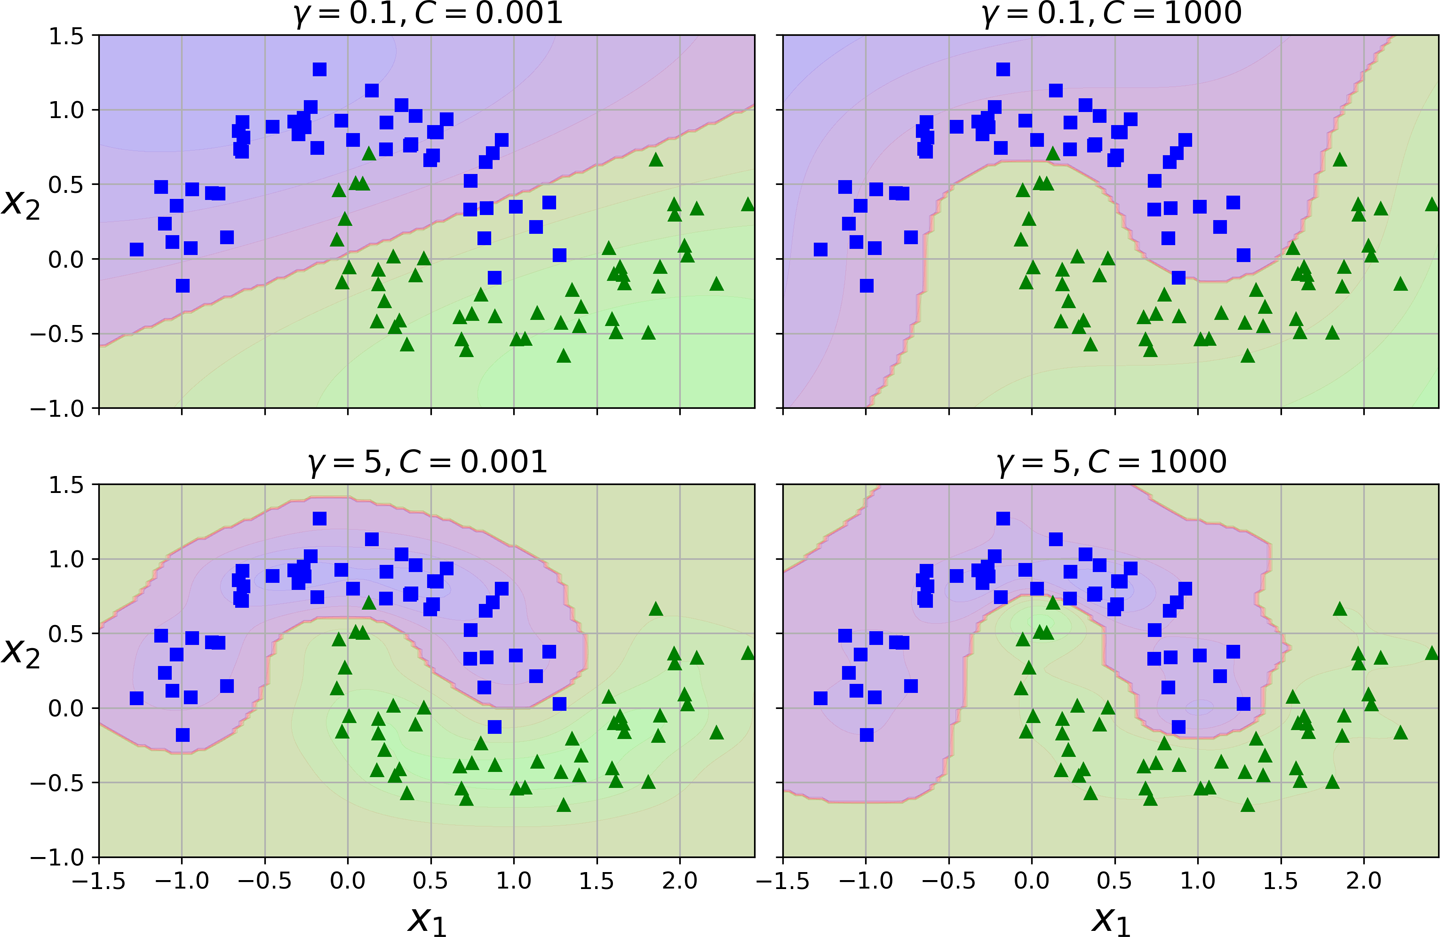

## 4. Computational Complexity
* Linear SVC = O(mxn)
* SVC = O(m^3xn)